In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt
import matplotlib 

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import sys, os
root = os.path.join(os.getcwd(), '../../')
sys.path.append(root)

import math

In [2]:
from gpt import GPT
from gpt.bstatic import Sectormagnet
from gpt.element import Screen
from gpt.lattice import Lattice

merger = Lattice('LEReC-Merger')

min_clearance = 0.0254     # [1"] meters
pipe_diameter = 2.0*0.0254 # [1"] meters
  
angle = 20
p = 1e6
R = 0.8594366926962348
pipe_length=4.2

scale = 1

merger.add(Sectormagnet('b1', R, +angle, p, phi_in=angle/4, phi_out=angle/4, gap=0.05), ds=0.25)
merger.add(Sectormagnet('b2', R, -angle, p, phi_in=angle/4, phi_out=angle/4, gap=0.05), ds=pipe_length)

#merger.add(Map1D_B('sol4', SOL2_FILE, column_names={'z':'z', 'Bz':'Bz'}, width=0.6, scale=+scale, field_pos='center'), ds=1.05, ref_element='b1', element_origin='center')
#merger.add(Map1D_B('sol5', SOL2_FILE, column_names={'z':'z', 'Bz':'Bz'}, width=0.6, scale=-scale, field_pos='center'), ds=3.15, ref_element='b1', element_origin='center')
merger.add(Screen('scr1'), ref_element='b1', ds=2.1)
merger.add(Screen('scr2'), ds=0.05)


merger2 = Lattice('LEReC-Merger2')

min_clearance = 0.0254     # [1"] meters
pipe_diameter = 2.0*0.0254 # [1"] meters
  
angle = 20
p = 1e6
R = 0.8594366926962348
pipe_length=4.2

scale = 1

merger2.add(Sectormagnet('b3', R, +angle, p, phi_in=angle/4, phi_out=angle/4, gap=0.05), ds=0.25)
merger2.add(Sectormagnet('b4', R, -angle, p, phi_in=angle/4, phi_out=angle/4, gap=0.05), ds=pipe_length)

#merger.add(Map1D_B('sol4', SOL2_FILE, column_names={'z':'z', 'Bz':'Bz'}, width=0.6, scale=+scale, field_pos='center'), ds=1.05, ref_element='b1', element_origin='center')
#merger.add(Map1D_B('sol5', SOL2_FILE, column_names={'z':'z', 'Bz':'Bz'}, width=0.6, scale=-scale, field_pos='center'), ds=3.15, ref_element='b1', element_origin='center')
merger2.add(Screen('scr3'), ref_element='b3', ds=2.1)
merger2.add(Screen('scr4'), ds=0.05)

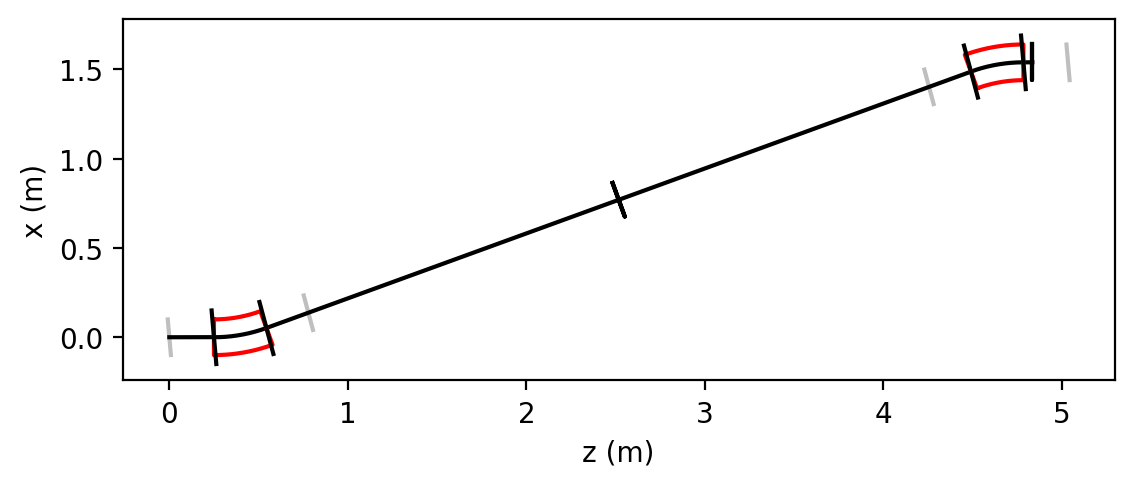

In [3]:
merger.plot_floor();

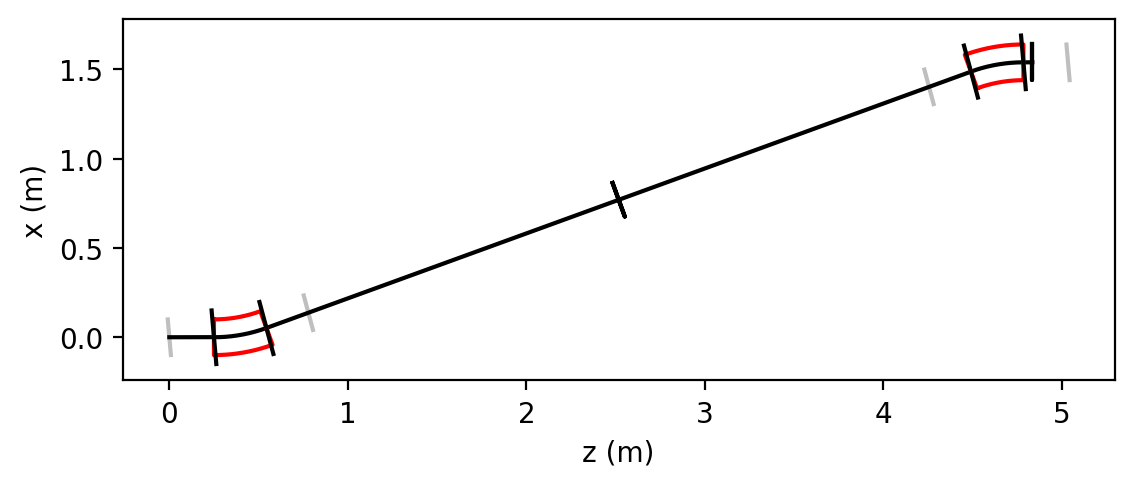

In [4]:
merger2.plot_floor();

In [5]:
combo = merger.combine(merger2)

10.2

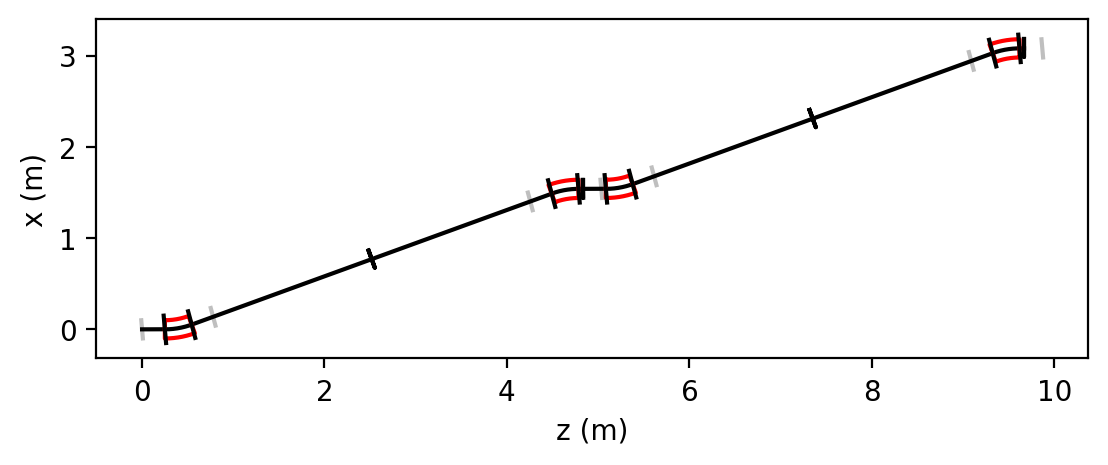

In [6]:
combo.plot_floor()

combo[-1].s_beg

In [7]:
from pmd_beamphysics import single_particle

particle = single_particle(pz=p)

combo.write_gpt_lines(output_file='gpt.temp.in');

In [8]:
from gpt import GPT

G = GPT('gpt.temp.in', initial_particles=particle)
G.set_variables({'Ntout':100, 'tmax':1.3*10/3e8, 'GBacc':6.5})
G.run()
print(G)


GPT object:
   Original input file: gpt.temp.in
   Template location: /Users/colwyngulliford/GitHub/lume-gpt/examples/elements
   Use temp directory: True

Run Control
   Run configured: True
   Work location: /var/folders/jf/c053b9m10035hkwq4wd3bzhr0000gn/T/tmpm_wjlkqj
   Timeout: None (sec)

Results
   Finished: True
   Error occured: False
   Run time: 0.039321184158325195 (sec)


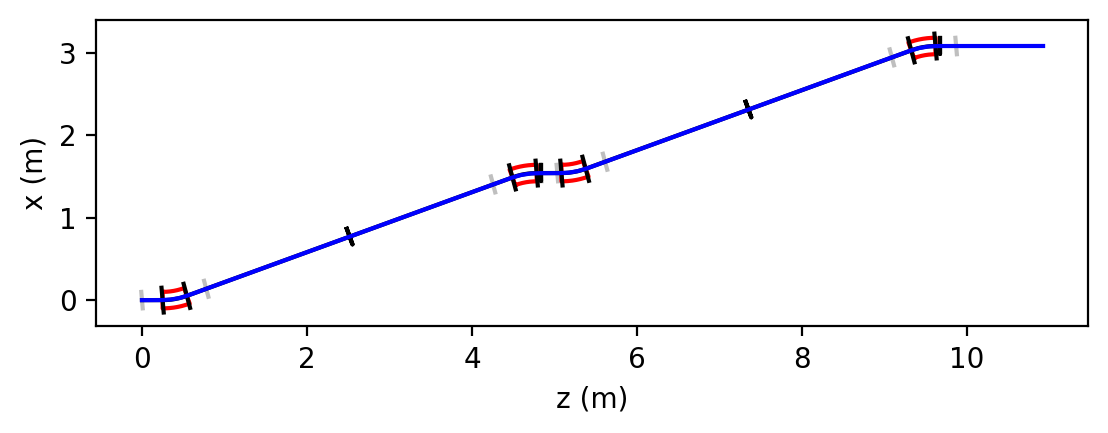

In [9]:
combo.plot_floor(axis='equal');
plt.plot(G.stat('mean_z','tout'), G.stat('mean_x','tout'), 'b')
plt.xlabel('z (m)');
plt.ylabel('x (m)');


In [10]:
G.s_ccs

array([ 0.        ,  0.11568169,  0.23136337,  0.34704506,  0.46272674,
        0.57840843,  0.69409011,  0.8097718 ,  0.92545348,  1.04113517,
        1.15681685,  1.27249854,  1.38818022,  1.50386191,  1.61954359,
        1.73522528,  1.85090696,  1.96658865,  2.08227033,  2.19795202,
        2.3136337 ,  2.42931539,  2.54499707,  2.66067876,  2.77636044,
        2.89204213,  3.00772381,  3.1234055 ,  3.23908718,  3.35476887,
        3.47045055,  3.58613224,  3.70181392,  3.81749561,  3.93317729,
        4.04885898,  4.16454066,  4.28022235,  4.39590403,  4.51158572,
        4.6272674 ,  4.74294909,  4.85863077,  4.97431246,  5.08999414,
        5.20567583,  5.32135751,  5.4370392 ,  5.55272088,  5.66840257,
        5.78408425,  5.89976594,  6.01544762,  6.13112931,  6.24681099,
        6.36249268,  6.47817436,  6.59385605,  6.70953773,  6.82521942,
        6.9409011 ,  7.05658279,  7.17226447,  7.28794616,  7.40362784,
        7.51930953,  7.63499121,  7.7506729 ,  7.86635458,  7.98

In [11]:
os.remove('gpt.temp.in')